## Importing the tools needed 

In [1]:
import numpy as np # linear algebra 

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import MinMaxScaler #importing the data scaling tool MinMaxScaler

from scipy import linalg # linear algebra calculations and matrix inversion included

%matplotlib inline 

import matplotlib.pyplot as plt #for detailed visualization

import seaborn as sns #for fast and flexable visualization

## show the Data

In [2]:
#read the csv file
df = pd.read_csv("train.csv")

# select columns to use
df = df[['1stFlrSF',"SalePrice"]] 

#to show the first 5 rows
df.head()

,1stFlrSF,SalePrice
0,856,208500
1,1262,181500
2,920,223500
3,961,140000
4,1145,250000


In [3]:
#information about the data (null values , datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   1stFlrSF   1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


## find relations

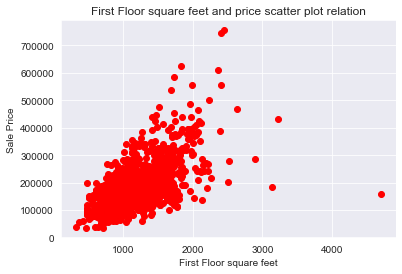

In [4]:
sns.set_style("darkgrid") #set style to make it look better

plt.plot(df["1stFlrSF"], df["SalePrice"],'ro') 
#graph of size column on x axis and price column on y axis

plt.xlabel('First Floor square feet') #x axis label
plt.ylabel('Sale Price')  #y axis label

plt.title("First Floor square feet and price scatter plot relation"); #title of graph

we see strong posititve correlation that will make it easier for out model to fit good to it

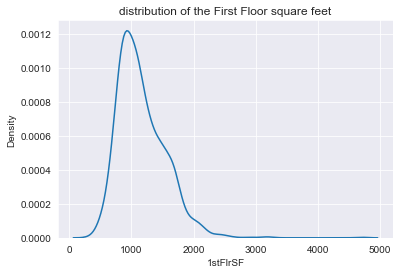

In [5]:
sns.kdeplot(df["1stFlrSF"])
plt.title("distribution of the First Floor square feet");

the distribution of the data is skewed to the right which most of the points are in range 500 to 2000Cost_normal

In [6]:
#select the independent columns
X = df["1stFlrSF"].values # cahnge it from pd.series to numpy array
X = X.reshape((X.shape[0],1)) # change the shape from (1460,None) to (1460,1) to prevent shape errors

# select the dependant column
Y = df["SalePrice"].values # change it from pd.series to numpy array
Y = Y.reshape((Y.shape[0],1)) #  # change the shape from (1460,None) to (1460,1) to prevent shape errors

#number of training examples
m = X.shape[0] 

print("independant data shape : ",X.shape)
print("dependant data shape : ",Y.shape)
print("number of training examples : ",m)

independant data shape :  (1460, 1)
dependant data shape :  (1460, 1)
number of training examples :  1460


## Scaling (Min Max Scaler):

$$ X_{sc} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$


MinMaxScaler take the same data distribution and scale it between 0 and 1 whic will prevent infinity numbers to appear at the gradient descent process

scaling is a must when it comes to large numbers as in the independant features eg.(1stFlrSF)

In [7]:
#initializing MinMaxScaler to an object
scale = MinMaxScaler()

X_scaled = scale.fit_transform(X)

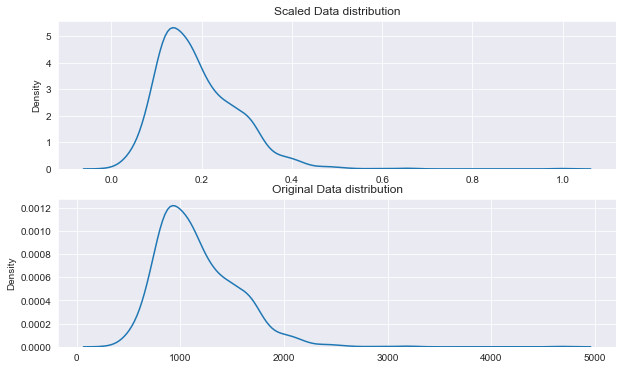

In [8]:
fig, axs = plt.subplots(2,figsize=(10,6)) 
sns.kdeplot(x=X_scaled[:,0],ax=axs[0])
axs[0].set_title("Scaled Data distribution")

sns.kdeplot(x=X[:,0],ax=axs[1])
axs[1].set_title("Original Data distribution");

### hypothesis function :
#### function used to predict
in linear model it is used to predict by making line pass through the points

$$\hat{Y} = \hat{\theta}_{0} + \sum \limits _{i=1} ^ {m} X_{i}\hat{\theta}_{i}$$

In [9]:
def hypothesis(X, Theta): 
    #hypothesis function
    X = np.append(np.ones((X.shape[0],1)), X.reshape((X.shape[0],1)), axis = 1) # (97, 2) append ones to identify x[0]
    Theta = Theta.reshape(2,1)  # (2, 1) two thetas for x[0] and for x[1]
    return X.dot(Theta)  # (1460, 2) dot (2, 1) = (1460, 1)

### Cost function (mean squared):

calculate the difference in value between the predicted and the true value

$$J(\theta_0,\theta_1) = \frac{1}{2m}\sum\limits _{i=1}^{m}(\hat{Y}-Y^{i})^2 $$

![1_ool361dWI61RMDyUAmalmA](https://user-images.githubusercontent.com/59618586/114189551-99afd880-994a-11eb-802b-f131a9b0e4fe.png)

In [10]:
def cost_function(X, Theta, Y):
    return (1/(2*m)) * np.sum( np.square(Y - hypothesis(X, Theta)) )

### Gradient descent optimizer
minimize the cost function by changing the weights (theta) after each iteration.

$$ \theta = \theta - \frac{\alpha}{m} \sum \limits _{i=1}^{m}(\hat{Y}-Y^{i}).X^i$$

![0cef7a_216e740d402b4a1f9c8f4ccaac893622_mv2](https://user-images.githubusercontent.com/59618586/114191120-5a828700-994c-11eb-90cb-f198e2b6171f.jpg)


In [11]:
def gradient_descent(X, Y, Theta, alpha, iterations):
    history=[]
    for i in range(iterations):

        Theta = Theta - ( (alpha/m) * (X.T).dot(hypothesis(X, Theta) - Y) )
        Cost = cost_function(X, Theta, Y)
        history.append(Cost)
    return Theta,history

In [12]:
Theta,history = gradient_descent(X_scaled, Y, Theta = np.array([77756,542573]).reshape((2,1)), alpha = 0.01,iterations= 1000)

P = hypothesis(X_scaled, Theta)

Cost_linear = cost_function(X_scaled, Theta, Y)

In [13]:
print("the trained weights : \n",Theta)

the trained weights : 
 [[ 77756.60152061]
 [542573.60152061]]


### Lets see how our model did visually on data

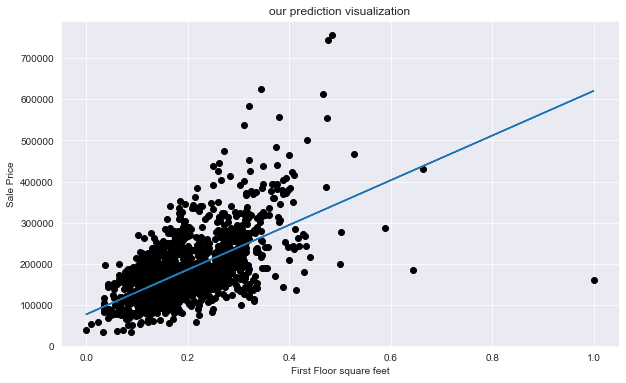

In [14]:
plt.figure(figsize=(10,6))
plt.plot(X_scaled, Y, 'ko') #scatterplot of the data
plt.plot(X_scaled, P, '-') #our model prediction

plt.title("our prediction visualization")
plt.xlabel('First Floor square feet')
plt.ylabel('Sale Price');

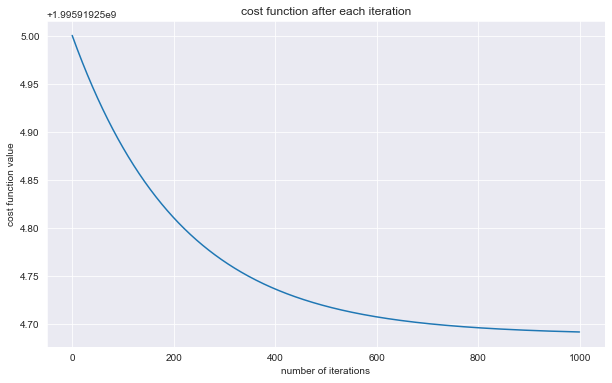

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(0,1000),y=history)

plt.title("cost function after each iteration")
plt.xlabel('number of iterations')
plt.ylabel('cost function value');

In [16]:
print("the value of cost function after each iteration : \n",history[:10])
print("\nfinal cost function of the linear regression module : \n",Cost_linear)

the value of cost function after each iteration : 
 [1995919255.00088, 1995919254.9994154, 1995919254.9979572, 1995919254.9965065, 1995919254.995062, 1995919254.9936247, 1995919254.992194, 1995919254.9907699, 1995919254.9893525, 1995919254.9879415]

final cost function of the linear regression module : 
 1995919254.6911561


we see slightly a decrease in the cost function due to the effect of the tangent in the (cost/theta) convex function on alpha the Learning rate which large at the beginning and then decreased by decreasing the slope

## Bonus

### normal equation
same functionality as gradient descent to get the right learning weights.

pros :

* no hyperparameters
* no need for loops and iterations (less time)
* more accurate

cons:

* can't work with more than 10k training examples

### hypothesis function :

$$\hat{Y} = \hat{\theta}_{0} + \sum \limits _{i=1} ^ {m} X_{i}\hat{\theta}_{i}$$

In [17]:
def hypothesis(X, Theta): 
    #hypothesis function
    X = np.append(np.ones((X.shape[0],1)), X.reshape((X.shape[0],1)), axis = 1) # (97, 2) append ones to identify x[0]
    Theta = Theta.reshape(2,1)  # (2, 1) two thetas for x[0] and for x[1]
    return X.dot(Theta)  # (97, 2) dot (2, 1) = (97, 1)

#### Normal function equation

$$ (X^T . X)^{-1} . (X^T.Y)$$

In [18]:
def normal_equation(X,Y):
    X = np.append(np.ones((X.shape[0],1)), X.reshape((X.shape[0],1)), axis = 1)
    return ( linalg.inv((X.T).dot(X)).dot((X.T).dot(Y)) )

#### Cost function (mean squared):

$$J(\theta_0,\theta_1) = \frac{1}{2m} \sum \limits _{i=1}^{m}(\hat{Y}-Y^{i})^2 $$

In [19]:
def cost_function(X, Theta, Y):
    return (1/(2*m)) * np.sum( np.square(Y - hypothesis(X, Theta)) )

In [20]:
Theta = normal_equation(X_scaled,Y).reshape(2,1)
P = hypothesis(X_scaled, Theta)
Cost_normal = cost_function(X_scaled, Theta, Y)

print("the trained weights : \n",Theta,"\n")
print("the final cost value of the normal equation : \n",Cost_normal)

the trained weights : 
 [[ 77756.65461682]
 [542573.71163763]] 

the final cost value of the normal equation : 
 1995919254.6883683


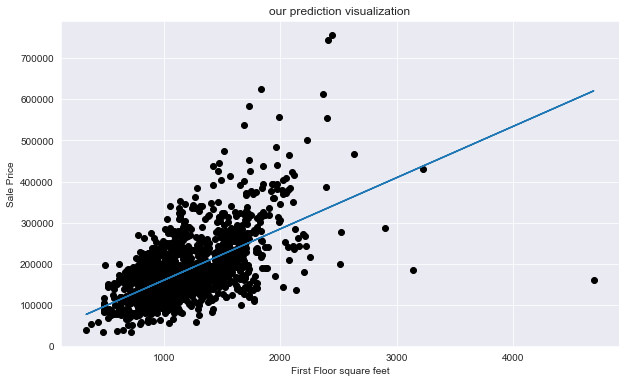

In [21]:
plt.figure(figsize=(10,6))
plt.plot(X, Y, 'ko') #scatterplot of the data
plt.plot(X, P, '-') #our model prediction

plt.title("our prediction visualization")
plt.xlabel('First Floor square feet')
plt.ylabel('Sale Price');

In [22]:
print("normal function cost : ",Cost_normal)
print("\nlinear regression cost : ",Cost_linear)

normal function cost :  1995919254.6883683

linear regression cost :  1995919254.6911561


we see it is more accurate than the linear regression module and less cost function also.